<a href="https://colab.research.google.com/github/robsonbfreitas/TrabalhoFinal/blob/main/TrabalhoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importando bibliotecas
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

**Carregando os arquivos a serem utilizados no modelo**

Features.csv - Arquivo que contém informações como: valores utilizados em feriados, indicador de feriado

train.csv - Arquivo que contém os valores de vendas

---



In [3]:
df = pd.read_csv('features.csv')
#dftest = pd.read_csv('test.csv')
dftrain = pd.read_csv('train.csv')
#df.head()

Separando dados para testes e dados de treino

In [4]:
df_teste = dftrain.query('Store >= 23')
df_train = dftrain.query('Store < 23')
df_teste.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
216819,23,1,2010-02-05,32452.79,False
216820,23,1,2010-02-12,50360.71,True
216821,23,1,2010-02-19,28504.70,False
216822,23,1,2010-02-26,23033.73,False
216823,23,1,2010-03-05,29662.30,False


In [5]:
df_teste.shape

(204751, 5)

In [6]:
df_train.shape

(216819, 5)

In [5]:
#frames = [df, dftrain]
df_testeFeature = df_teste.merge(df, on=['Store','Date'], how='left')
df_trainFeature = df_train.merge(df, on=['Store','Date'], how='left')

In [6]:
df_XTrain = df_trainFeature[['Store','Date','IsHoliday_y', 'Dept', 'Weekly_Sales','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']]
df_XTrain.head()

,Store,Date,IsHoliday_y,Dept,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,1,2010-02-05,False,1,24924.50,NaN,NaN,NaN,NaN,NaN
1,1,2010-02-12,True,1,46039.49,NaN,NaN,NaN,NaN,NaN
2,1,2010-02-19,False,1,41595.55,NaN,NaN,NaN,NaN,NaN
3,1,2010-02-26,False,1,19403.54,NaN,NaN,NaN,NaN,NaN
4,1,2010-03-05,False,1,21827.90,NaN,NaN,NaN,NaN,NaN


In [7]:
 df_XTeste = df_testeFeature[['Store','Date','IsHoliday_y', 'Dept', 'Weekly_Sales','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']]
df_XTeste.head()

,Store,Date,IsHoliday_y,Dept,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,23,2010-02-05,False,1,32452.79,NaN,NaN,NaN,NaN,NaN
1,23,2010-02-12,True,1,50360.71,NaN,NaN,NaN,NaN,NaN
2,23,2010-02-19,False,1,28504.70,NaN,NaN,NaN,NaN,NaN
3,23,2010-02-26,False,1,23033.73,NaN,NaN,NaN,NaN,NaN
4,23,2010-03-05,False,1,29662.30,NaN,NaN,NaN,NaN,NaN


In [8]:
df_XTrain['Date'] = pd.to_datetime(df_XTrain['Date'])
df_XTeste['Date'] = pd.to_datetime(df_XTeste['Date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Setando a coluna Date como índice


In [9]:
df_XTrain.set_index(['Date'], inplace=True)
df_XTeste.set_index(['Date'], inplace=True)

In [10]:
df_XTrain.head()

,Store,IsHoliday_y,Dept,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
Date,,,,,,,,,
2010-02-05,1,False,1,24924.50,NaN,NaN,NaN,NaN,NaN
2010-02-12,1,True,1,46039.49,NaN,NaN,NaN,NaN,NaN
2010-02-19,1,False,1,41595.55,NaN,NaN,NaN,NaN,NaN
2010-02-26,1,False,1,19403.54,NaN,NaN,NaN,NaN,NaN
2010-03-05,1,False,1,21827.90,NaN,NaN,NaN,NaN,NaN


In [11]:
df_XTeste.head()

,Store,IsHoliday_y,Dept,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
Date,,,,,,,,,
2010-02-05,23,False,1,32452.79,NaN,NaN,NaN,NaN,NaN
2010-02-12,23,True,1,50360.71,NaN,NaN,NaN,NaN,NaN
2010-02-19,23,False,1,28504.70,NaN,NaN,NaN,NaN,NaN
2010-02-26,23,False,1,23033.73,NaN,NaN,NaN,NaN,NaN
2010-03-05,23,False,1,29662.30,NaN,NaN,NaN,NaN,NaN


Trocando NaN por zero nos dataframes de treino e testes

In [12]:
df_XTrain.fillna(0, inplace=True)
df_XTeste.fillna(0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [13]:
df_XTeste.tail(10000)

,Store,IsHoliday_y,Dept,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
Date,,,,,,,,,
2011-05-27,44,False,96,3138.26,0.00,0.00,0.00,0.00,0.00
2011-06-03,44,False,96,2921.07,0.00,0.00,0.00,0.00,0.00
2011-06-10,44,False,96,3296.00,0.00,0.00,0.00,0.00,0.00
2011-06-17,44,False,96,3091.16,0.00,0.00,0.00,0.00,0.00
2011-06-24,44,False,96,3296.80,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
2012-09-28,45,False,98,508.37,4556.61,20.64,1.50,1601.01,3288.25
2012-10-05,45,False,98,628.10,5046.74,0.00,18.82,2253.43,2340.01
2012-10-12,45,False,98,1061.02,1956.28,0.00,7.89,599.32,3990.54


Setando os campos y_teste e y_train

In [14]:
y_train = df_XTrain[['Weekly_Sales']]
y_train

,Weekly_Sales
Date,
2010-02-05,24924.50
2010-02-12,46039.49
2010-02-19,41595.55
2010-02-26,19403.54
2010-03-05,21827.90
...,...
2012-10-05,427.25
2012-10-12,247.46
2012-10-19,390.40


In [15]:
y_teste = df_XTeste[['Weekly_Sales']]
y_teste

,Weekly_Sales
Date,
2010-02-05,32452.79
2010-02-12,50360.71
2010-02-19,28504.70
2010-02-26,23033.73
2010-03-05,29662.30
...,...
2012-09-28,508.37
2012-10-05,628.10
2012-10-12,1061.02


Desprezando a primeira linha

In [16]:
y_train = y_train.iloc[1:]
#y = y.dropna()
y_train.head()

,Weekly_Sales
Date,
2010-02-12,46039.49
2010-02-19,41595.55
2010-02-26,19403.54
2010-03-05,21827.90
2010-03-12,21043.39


In [17]:
y_teste = y_teste.iloc[1:]
#y = y.dropna()
y_teste.head()

,Weekly_Sales
Date,
2010-02-12,50360.71
2010-02-19,28504.70
2010-02-26,23033.73
2010-03-05,29662.30
2010-03-12,33445.02


Criando o dataframe X_train para treino

In [18]:
X_train = df_XTrain[['Store','Dept','IsHoliday_y','Weekly_Sales','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].shift(1)
#X = df.shift(1)
X_train

,Store,Dept,IsHoliday_y,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
Date,,,,,,,,,
2010-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-12,1.0,1.0,False,24924.50,0.00,0.00,0.00,0.00,0.00
2010-02-19,1.0,1.0,True,46039.49,0.00,0.00,0.00,0.00,0.00
2010-02-26,1.0,1.0,False,41595.55,0.00,0.00,0.00,0.00,0.00
2010-03-05,1.0,1.0,False,19403.54,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
2012-10-05,22.0,98.0,False,136.04,4269.80,23.73,1.72,2763.63,2130.39
2012-10-12,22.0,98.0,False,427.25,5294.37,0.00,4.25,1447.19,3652.84
2012-10-19,22.0,98.0,False,247.46,1558.08,0.00,10.35,485.20,4291.26


Criando o dataframe X_teste para teste

In [19]:
X_teste = df_XTeste[['Store','Dept','IsHoliday_y','Weekly_Sales','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].shift(1)
X_teste

,Store,Dept,IsHoliday_y,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
Date,,,,,,,,,
2010-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-12,23.0,1.0,False,32452.79,0.00,0.00,0.00,0.00,0.00
2010-02-19,23.0,1.0,True,50360.71,0.00,0.00,0.00,0.00,0.00
2010-02-26,23.0,1.0,False,28504.70,0.00,0.00,0.00,0.00,0.00
2010-03-05,23.0,1.0,False,23033.73,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
2012-09-28,45.0,98.0,False,467.30,8452.20,92.28,63.24,2376.38,8670.40
2012-10-05,45.0,98.0,False,508.37,4556.61,20.64,1.50,1601.01,3288.25
2012-10-12,45.0,98.0,False,628.10,5046.74,0.00,18.82,2253.43,2340.01


In [20]:
X_train = X_train.iloc[1:]
#X = X.dropna()
X_train.head()

,Store,Dept,IsHoliday_y,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
Date,,,,,,,,,
2010-02-12,1.0,1.0,False,24924.50,0.0,0.0,0.0,0.0,0.0
2010-02-19,1.0,1.0,True,46039.49,0.0,0.0,0.0,0.0,0.0
2010-02-26,1.0,1.0,False,41595.55,0.0,0.0,0.0,0.0,0.0
2010-03-05,1.0,1.0,False,19403.54,0.0,0.0,0.0,0.0,0.0
2010-03-12,1.0,1.0,False,21827.90,0.0,0.0,0.0,0.0,0.0


In [21]:
X_teste = X_teste.iloc[1:]
#X = X.dropna()
X_teste.head()

,Store,Dept,IsHoliday_y,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
Date,,,,,,,,,
2010-02-12,23.0,1.0,False,32452.79,0.0,0.0,0.0,0.0,0.0
2010-02-19,23.0,1.0,True,50360.71,0.0,0.0,0.0,0.0,0.0
2010-02-26,23.0,1.0,False,28504.70,0.0,0.0,0.0,0.0,0.0
2010-03-05,23.0,1.0,False,23033.73,0.0,0.0,0.0,0.0,0.0
2010-03-12,23.0,1.0,False,29662.30,0.0,0.0,0.0,0.0,0.0


In [22]:
X_train.shape, X_teste.shape, y_train.shape, y_teste.shape

((216818, 9), (204750, 9), (216818, 1), (204750, 1))

Criando colunas novas a partir da coluna IsHoliday com 0 e 1 ao invés de True ou False

In [23]:
X_train = pd.get_dummies(X_train)
X_train.head()

,Store,Dept,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday_y_False,IsHoliday_y_True
Date,,,,,,,,,,
2010-02-12,1.0,1.0,24924.50,0.0,0.0,0.0,0.0,0.0,1,0
2010-02-19,1.0,1.0,46039.49,0.0,0.0,0.0,0.0,0.0,0,1
2010-02-26,1.0,1.0,41595.55,0.0,0.0,0.0,0.0,0.0,1,0
2010-03-05,1.0,1.0,19403.54,0.0,0.0,0.0,0.0,0.0,1,0
2010-03-12,1.0,1.0,21827.90,0.0,0.0,0.0,0.0,0.0,1,0


In [24]:
X_teste = pd.get_dummies(X_teste)
X_teste.head()

,Store,Dept,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday_y_False,IsHoliday_y_True
Date,,,,,,,,,,
2010-02-12,23.0,1.0,32452.79,0.0,0.0,0.0,0.0,0.0,1,0
2010-02-19,23.0,1.0,50360.71,0.0,0.0,0.0,0.0,0.0,0,1
2010-02-26,23.0,1.0,28504.70,0.0,0.0,0.0,0.0,0.0,1,0
2010-03-05,23.0,1.0,23033.73,0.0,0.0,0.0,0.0,0.0,1,0
2010-03-12,23.0,1.0,29662.30,0.0,0.0,0.0,0.0,0.0,1,0


In [27]:
X_teste.isna().mean()

Store                0.0
Dept                 0.0
Weekly_Sales         0.0
MarkDown1            0.0
MarkDown2            0.0
MarkDown3            0.0
MarkDown4            0.0
MarkDown5            0.0
IsHoliday_y_False    0.0
IsHoliday_y_True     0.0
dtype: float64

In [28]:
X_train.isna().mean()

Store                0.0
Dept                 0.0
Weekly_Sales         0.0
MarkDown1            0.0
MarkDown2            0.0
MarkDown3            0.0
MarkDown4            0.0
MarkDown5            0.0
IsHoliday_y_False    0.0
IsHoliday_y_True     0.0
dtype: float64

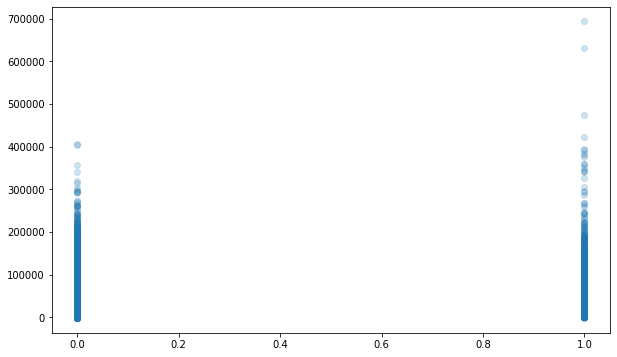

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train['IsHoliday_y_True'],X_train['Weekly_Sales'], alpha=0.2)

In [32]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
result_Xteste = reg.predict(X_teste)

In [ ]:
#result_Xtrain = reg.predict(X_train)

In [34]:
result_Xteste

array([[31397.73944193],
       [47426.80347171],
       [27664.84695981],
       ...,
       [ 1895.29219989],
       [ 2382.60756789],
       [ 1929.15530315]])

In [ ]:
#result_Xtrain

array([[24336.71038135],
       [43398.03747823],
       [40099.07578181],
       ...,
       [ 1690.2577492 ],
       [ 1752.69546707],
       [ 1433.24353461]])

In [35]:
# Utilizando R2 para medir a performance do modelo
r2_score(y_teste, result_Xteste)

0.890660380138579

In [ ]:
r2_score(y_train, result_Xtrain)

0.8951446513494363